In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.stats.diagnostic import het_goldfeldquandt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from chow_test import chowtest

## Описание задания

In [2]:
with open('../data/stats/regression/Описание.txt') as file:
    print(file.read())

Для выполнения практического задания необходимо:
1. Открыть папку, соотвествующую своей группе.
2. Открыть папку с вариантом, совпадающим с вашим номером в списке.

В папке 3 файла с данными.
1-ый файл содержит 2 ряда данных. Необходимо построить линейную регрессию между ними (1-ый стоблец содержит факторную переменную, 2-ой результирующую), 
оценить значимость полученных коэффициентов прямой и построить доверительные интервалы для них, оценить адекватность модели.
2-ой файл содержит 4 ряда данных. Первый ряд (столбец) содержит количественную факторную переменную, следующие два - качественную факторную переменную, последний - результирующую переменную.
Необходимо с помощью теста Чоу обосновать необходимость деления выборки по одной из качественных факторных переменных. Произвести разбиение и построить две линейных регрессии.
3-ий файл содержит 2 ряда данных. Необходимо двумя способами (тест Спирмена и тест Гольдфельда-Квандта) определить, 
присутствует ли в данных гетероскедастичность,

## Задание 1. Линейная регрессия: построение дов. интервалов для коэффициентов, оценка адекватности модели с помощью F-критерия

In [3]:
data = pd.read_csv('../data/stats/regression/1.txt', sep=',', header=None, names=['factor', 'result'])
data.head(5)

,factor,result
0,5.000000,-1.649232
1,5.202020,-2.240981
2,5.404040,-2.129472
3,5.606061,-2.373086
4,5.808081,-1.971503


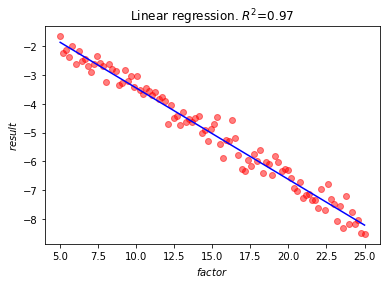

In [4]:
# Создание модели и подготовка данных
lin_reg = LinearRegression()
X = np.array(data['factor']).reshape((-1, 1))
y = np.array(data['result']).reshape((-1, 1))

# Обучение и предсказание, расчет метрики R^2
lin_reg.fit(X, y)
y_predicted = lin_reg.predict(X)
r2 = lin_reg.score(X, y)

# Построение графика
plt.title(f'Linear regression. $R^2$={r2.round(2)}')
plt.scatter(X, y, alpha=0.5, color='red')
plt.plot(X, y_predicted, color='blue')
plt.xlabel('$factor$')
plt.ylabel('$result$')
plt.show()

По графику видно, что полученная линейная модель достаточно точно описывает исходную зависимость, о чем также говорит коэффициент детерминации $R^2$, равный 0.97.

In [5]:
# Параметры модели линейной регрессии
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
print(f'b0 (смещение) = {b0}, b1 (коэффициенты признака x) = {b1}')

# Вычисление ошибки параметров
lin_model = sts.linregress(np.array(data['factor']), np.array(data['result']))
b0_err, b1_err = lin_model.intercept_stderr, lin_model.stderr

# Доверительные интервалы для коэффициентов регрессии
alpha = 0.05
b0_confidence_interval = sts.t.interval(1-alpha, df=len(data)-2, loc=b0, scale=b0_err)
b1_confidence_interval = sts.t.interval(1-alpha, df=len(data)-2, loc=b1, scale=b1_err)
print(f'Доверительный интервал для b0: {b0_confidence_interval}\nДоверительный интервал для b1: {b1_confidence_interval}')

b0 (смещение) = -0.27245719813533587, b1 (коэффициенты признака x) = -0.31767029464733265
Доверительный интервал для b0: (-0.43990578015466264, -0.10500861611600906)
Доверительный интервал для b1: (-0.32807490801076106, -0.30726568128390425)


Поскольку доверительные интервалы для обоих коэффициентов не включают в себя ноль, можно говорить о значимости этих самых коэффициентов для модели и значимости модели в целом.

In [6]:
# Проверка адекватности модели с помощью F-критерия (критерия Фишера)
adequacy = f_regression(X, y.reshape(len(data)))
print(f'f-stat={adequacy[0][0].round(2)}, p-value={adequacy[1][0].round(2)}')

f-stat=3671.04, p-value=0.0


Значение p-value для полученного значения f-статистики крайне мало, что говорит о значимости и адекватности построенной модели.

## Задание 2. Тест Чоу: деление выборки по одной из качественных переменных

In [7]:
data = pd.read_csv('../data/stats/regression/2.txt', sep=',', header=None, names=['col', 'cat1', 'cat2', 'res'])
data.head(5)

,col,cat1,cat2,res
0,11.060606,0.0,0.0,-25.196182
1,20.151515,1.0,0.0,35.778727
2,8.838384,1.0,0.0,17.565945
3,6.212121,0.0,0.0,-16.618155
4,14.898990,1.0,1.0,25.967648


Визуализируем данные в зависимости от значений каждой из качественных переменных.

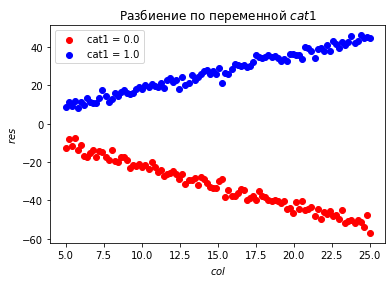

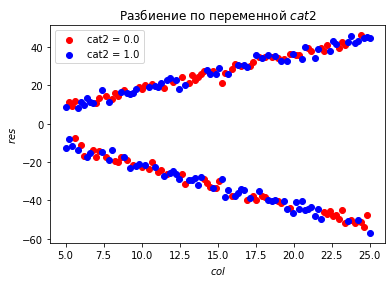

In [8]:
plt.title('Разбиение по переменной $cat1$')
plt.scatter(data[data.cat1 == 0.0]['col'], data[data.cat1 == 0.0]['res'], color='red', label='cat1 = 0.0')
plt.scatter(data[data.cat1 == 1.0]['col'], data[data.cat1 == 1.0]['res'], color='blue', label='cat1 = 1.0')
plt.xlabel('$col$')
plt.ylabel('$res$')
plt.legend()
plt.show()

plt.title('Разбиение по переменной $cat2$')
plt.scatter(data[data.cat2 == 0.0]['col'], data[data.cat2 == 0.0]['res'], color='red', label='cat2 = 0.0')
plt.scatter(data[data.cat2 == 1.0]['col'], data[data.cat2 == 1.0]['res'], color='blue', label='cat2 = 1.0')
plt.xlabel('$col$')
plt.ylabel('$res$')
plt.legend()
plt.show()

По графикам видно, что выборка достаточно хорошо разделяется по значениям переменной `cat1`. Проверим это, рассчитав значение F-статистики для теста Чоу.

In [9]:
# Тест Чоу для разбиения по cat1
# Переформируем данные, чтобы сначала шли строки с cat1 = 0 (100 элементов), затем с cat2 = 1 (100 элементов)
df = pd.concat([data[data.cat1 == 0.0], data[data.cat1 == 1.0]], ignore_index=True)
chow_cat1 = chowtest(X=df[['col', 'cat1']], 
                     y=pd.DataFrame(df['res']),
                     last_index_in_model_1=99, 
                     first_index_in_model_2=100,
                     significance_level=0.05)

print()

# Тест Чоу для разбиения по cat2
# Переформируем данные, чтобы сначала шли строки с cat2 = 0 (95 элементов), затем с cat2 = 1 (105 элементов)
df = pd.concat([data[data.cat2 == 0.0], data[data.cat2 == 1.0]], ignore_index=True)
chow_cat2 = chowtest(X=df[['col', 'cat2']], 
                     y=pd.DataFrame(df['res']),
                     last_index_in_model_1=94, 
                     first_index_in_model_2=95,
                     significance_level=0.05)

****************************************************************************************************
Reject the null hypothesis of equality of regression coefficients in the 2 periods.
****************************************************************************************************
Chow Statistic: 2218.1810199964625 p value: 0.0
****************************************************************************************************

****************************************************************************************************
Fail to reject the null hypothesis of equality of regression coefficients in the 2 periods.
****************************************************************************************************
Chow Statistic: 0.31906931549821266 p value: 0.90112
****************************************************************************************************


Полученное значение для `cat1` сильно больше критического, p-value крайне мало, что говорит об отвержении $H0$ об однородности данных, чего нельзя сказать про разбиение по `cat2`. 

Произведем разбиение по `cat1` и построим две линейные регрессии для каждой из подвыборок. Визуализируем полученный результат.

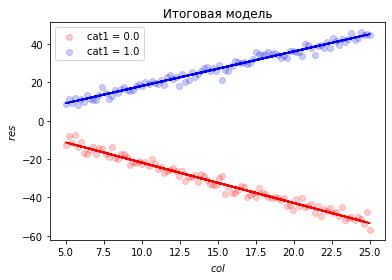

In [10]:
# Разбиение
sample1 = data[data.cat1 == 0]
sample2 = data[data.cat1 == 1]

# Создание моделей и подготовка данных
lin_reg1 = LinearRegression()
X1 = np.array(sample1['col']).reshape((-1, 1))
y1 = np.array(sample1['res']).reshape((-1, 1))

lin_reg2 = LinearRegression()
X2 = np.array(sample2['col']).reshape((-1, 1))
y2 = np.array(sample2['res']).reshape((-1, 1))

# Обучение и предсказание
lin_reg1.fit(X1, y1)
y1_predicted = lin_reg1.predict(X1)

lin_reg2.fit(X2, y2)
y2_predicted = lin_reg2.predict(X2)

# Построение графика
plt.title('Итоговая модель')
plt.scatter(X1, y1, alpha=0.2, color='red', label='cat1 = 0.0')
plt.plot(X1, y1_predicted, color='red')

plt.scatter(X2, y2, alpha=0.2, color='blue', label='cat1 = 1.0')
plt.plot(X2, y2_predicted, color='blue')

plt.xlabel('$col$')
plt.ylabel('$res$')
plt.legend()
plt.show()


## Задание 3. Тест Спирмена и тест Гольдфельда-Квандта: определение гетероскедастичности в данных

In [11]:
data = pd.read_csv('../data/stats/regression/3.txt', sep=',', header=None, names=['factor', 'result'])
data.head(5)

,factor,result
0,5.000000,-16.316520
1,5.202020,-17.906738
2,5.404040,-17.031396
3,5.606061,-17.685788
4,5.808081,-21.497556


Визуализируем данные, чтобы увидеть линейную зависимость, если она действительно есть.

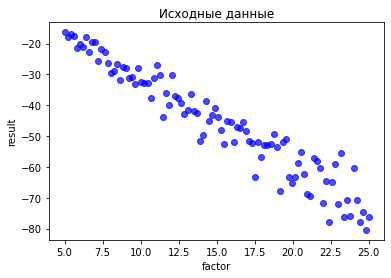

In [12]:
plt.title('Исходные данные')
plt.scatter(data['factor'], data['result'], alpha=0.7, color='blue')
plt.xlabel('factor')
plt.ylabel('result')
plt.show()

По приведенному графику видно, что в данных присутсвует гетероскедастичность, однако линейная зависимость все равно заметна. 

Проверим нашу гипотезу с помощью **теста Спирмена**.

In [13]:
spearman_test = sts.spearmanr(data['factor'], data['result'])
print(f'Коэфф. корреляции остатков и факторной переменной = {spearman_test.correlation}.\n' +
      f'p-value = {spearman_test.pvalue.round(2)}.\n' +
      'H0 об отсутствии гетероскедастичности' + (' отклоняется.' if spearman_test.pvalue < 0.05 else ' принимается.'))

Коэфф. корреляции остатков и факторной переменной = -0.9704770477047704.
p-value = 0.0.
H0 об отсутствии гетероскедастичности отклоняется.


Также проверить это можно с помощью **теста Гольдфельда-Квандта**.

In [14]:
f_stat, p_value, _ = het_goldfeldquandt(x=pd.DataFrame(data['factor']), y=data['result'])
print(f'F-статистика проведённого эксперимента = {f_stat}.\n' +
      f'p-value = {p_value}.\n' +
      'H0 об отсутствии гетероскедастичности' + (' отклоняется.' if p_value < 0.05 else ' принимается.'))

F-статистика проведённого эксперимента = 2.5423258740080383.
p-value = 0.0007034386038295393.
H0 об отсутствии гетероскедастичности отклоняется.


Далее построим линейную регрессию и оценим значимость её коэффициентов и общую адекватность модели.

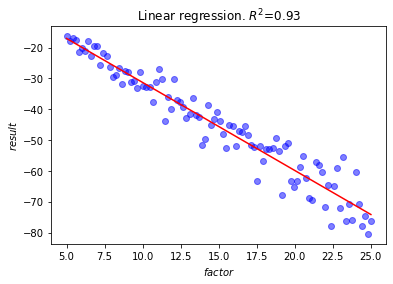

In [15]:
# Создание модели и подготовка данных
lin_reg = LinearRegression()
X = np.array(data['factor']).reshape((-1, 1))
y = np.array(data['result']).reshape((-1, 1))

# Обучение и предсказание, расчет метрики R^2
lin_reg.fit(X, y)
y_predicted = lin_reg.predict(X)
r2 = lin_reg.score(X, y)

# Построение графика
plt.title(f'Linear regression. $R^2$={r2.round(2)}')
plt.scatter(X, y, alpha=0.5, color='blue')
plt.plot(X, y_predicted, color='red')
plt.xlabel('$factor$')
plt.ylabel('$result$')
plt.show()

По графику видно, что несмотря на гетероскедастичность линейная модель смогла достаточно хорошо описать имеющиеся данные, так как коэффициент детерминации $R^2$ равен 0.93.

Оценим значимость коэффициентов полученной модели.

In [16]:
# Параметры модели линейной регрессии
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
print(f'b0 (смещение) = {b0}, b1 (коэффициенты признака x) = {b1}')

# Вычисление ошибки параметров
lin_model = sts.linregress(np.array(data['factor']), np.array(data['result']))
b0_err, b1_err = lin_model.intercept_stderr, lin_model.stderr

# Доверительные интервалы для коэффициентов регрессии
alpha = 0.05
b0_confidence_interval = sts.t.interval(1-alpha, df=len(data)-2, loc=b0, scale=b0_err)
b1_confidence_interval = sts.t.interval(1-alpha, df=len(data)-2, loc=b1, scale=b1_err)
print(f'Доверительный интервал для b0: {b0_confidence_interval}\nДоверительный интервал для b1: {b1_confidence_interval}')

b0 (смещение) = -2.756996354231333, b1 (коэффициенты признака x) = -2.8556387105635714
Доверительный интервал для b0: (-5.269871021981009, -0.24412168648165666)
Доверительный интервал для b1: (-3.0117791151784714, -2.6994983059486715)


Поскольку доверительные интервалы для обоих коэффициентов не включают в себя ноль, можно говорить о значимости этих самых коэффициентов для модели и значимости модели в целом.

In [17]:
# Проверка адекватности модели с помощью F-критерия (критерия Фишера)
adequacy = f_regression(X, y.reshape(len(data)))
print(f'f-stat={adequacy[0][0].round(2)}, p-value={adequacy[1][0].round(2)}')

f-stat=1317.24, p-value=0.0


Значение p-value для полученного значения f-статистики крайне мало, что говорит о значимости и адекватности построенной модели. 

Можем сделать вывод, что гетероскедастичность в исходных данных значимо не повлияла на качество модели линейной регрессии.